In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Carregamento do dataset
dataset = pd.read_csv("/home/wytcor/PROJECTs/mestrado-ufes/lab-life/datasets/zr7vgbcyr2-1/metadata.csv", sep=",")
dataset


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


Remover os dados que são inválidos

In [2]:
dataset=dataset.dropna()
dataset

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
6,PAT_778,1471,False,True,GERMANY,ITALY,52,False,FEMALE,False,...,10.0,BCC,False,True,False,True,True,True,PAT_778_1471_835.png,True
7,PAT_117,179,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,10.0,BCC,True,True,True,False,True,True,PAT_117_179_983.png,True
9,PAT_705,4015,False,True,GERMANY,GERMANY,58,True,FEMALE,True,...,7.0,ACK,False,True,False,False,False,False,PAT_705_4015_413.png,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,PAT_386,785,True,False,POMERANIA,POMERANIA,66,False,MALE,True,...,15.0,ACK,True,False,True,False,True,True,PAT_386_785_536.png,True
2291,PAT_273,421,False,False,POMERANIA,POMERANIA,41,True,MALE,False,...,5.0,BCC,True,UNK,True,UNK,True,True,PAT_273_421_905.png,True
2292,PAT_491,934,False,False,POMERANIA,POMERANIA,43,True,FEMALE,True,...,5.0,SCC,True,UNK,False,UNK,True,True,PAT_491_934_46.png,True
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True


Separação entre os dados das features e dos labels

Uso do hot-encoder para converter as variáveis categóricas para inteiras

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Seleção das features
dataset_features = dataset.drop(columns=['lesion_id', 'patient_id', 'img_id', 'diagnostic'])  # Features

# Identificar variáveis categóricas
categorical_cols = dataset_features.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder para cada coluna categórica
for col in categorical_cols:
    dataset_features[col] = le.fit_transform(dataset_features[col])

# Verificar os primeiros valores após a transformação
print(dataset_features.head(10))


    smoke  drink  background_father  background_mother  age  pesticide  \
1       0      0                  9                  7   55          0   
4       0      1                  9                  7   79          0   
6       0      1                  4                  3   52          0   
7       0      0                  9                  7   74          1   
9       0      1                  4                  2   58          1   
11      0      0                  9                  7   34          1   
13      0      0                  2                  0   78          0   
14      0      0                  4                  2   52          1   
15      1      0                  9                  7   77          0   
16      0      0                  7                  2   60          1   

    gender  skin_cancer_history  cancer_history  has_piped_water  ...  region  \
1        0                    1               1                1  ...      10   
4        1             

In [4]:
from sklearn.preprocessing import LabelEncoder

# Inicialize o LabelEncoder
le = LabelEncoder()

y = dataset['diagnostic']  # label

# Fit e transform os rótulos em X_train e y_train
y_encoded = le.fit_transform(y)

In [15]:

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(dataset_features, y_encoded, test_size=0.2, shuffle=True)

In [16]:

# Criar o modelo Random Forest
model = RandomForestClassifier(n_estimators=25, random_state=0, max_depth=10)

# Treinar o modelo
model.fit(X_train, y_train)

# Verificar a acurácia no conjunto de teste
accuracy = model.score(X_test, y_test)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 74.24%


Explicabilidade sobre a importância de cada variável


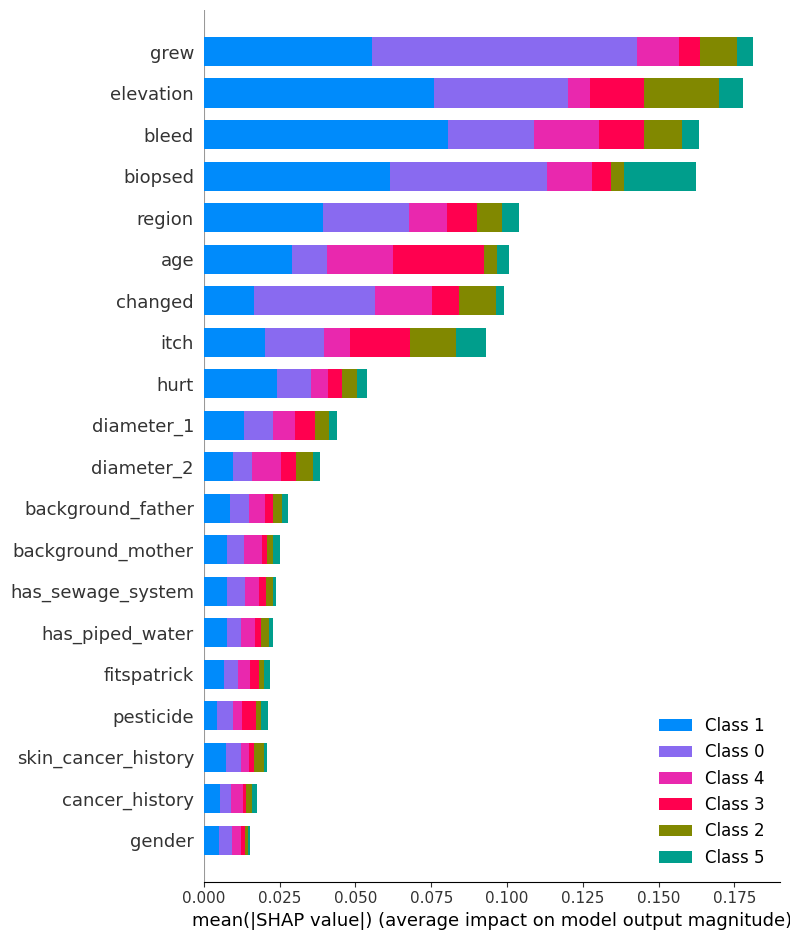

In [17]:
# Inicializar o explainer
explainer = shap.TreeExplainer(model)  # Para modelos de árvore como Random Forest
shap_values = explainer.shap_values(X_test)

# Visualizar as contribuições das features
shap.summary_plot(shap_values, X_test, plot_type="bar")


Conclusão

Podemos verificar que as features de maior relevância são:
-- elevation
--biopsed
-- grew
-- bleed
-- region
-- changed
-- age
